In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", None)


In [2]:
data= pd.read_csv(r"C:\Users\pylaa\Downloads\Emissions_Data_2023.csv")
data.head()

,state_id,state_abbr,county_state_name,county_id,county_name,latitude,longitude,consolidated_city-county,population,population_cohort,employment,employment_cohort,doe_climate_zone,cohort,consumption (MWh),expenditures in Millions,consumption (MWh/capita),expenditures in Millions.1,utility customers,GHG emissions mtons CO2e,consumption (TcF),expenditures in Millions.2,consumption (TcF/capita),expenditures in Millions.3,utility customers.1,occuped housing units,consumption (MWh).1,expenditures in Millions.4,consumption (MWh/capita).1,expenditures in Millions.5,consumption (MWh).2,expenditures in Millions.6,utility customers.2,consumption (TcF).1,expenditures in Millions.7,consumption (TcF/capita).1,expenditures in Millions.8,consumption (TcF).2,expenditures in Millions.9,utility customers.3,buildings,area (sq. ft.),consumption (gallons),consumption (gallons/capita),consumption (gallons).1,consumption (gallons/capita).1,vehicle miles traveled (miles),vehicle miles traveled (miles/capita),consumption (MWh).3,expenditures in Millions.10,consumption (MWh/capita).2,consumption (TcF).3,expenditures in Millions.11,consumption (TcF/capita).2,expenditures in Millions.12,establishments,consumption (MWh).4,expenditures in Millions.13
0,1,AL,"Autauga County, AL",1001,Autauga County,32.532237,-86.646440,NaN,55049,7,21580,5,3,30705,"315,398","39,864",6,1,"22,120","156,670","316,920","4,185",6,0,"9,750","20,800","128,186","14,821",2,0,"130,821","14,633","2,415","170,669","1,703",3,0,"152,812","1,627",468,NaN,NaN,"25,332,114",460,"11,506,887",209,"740,266,187","13,447","33,506","2,025",1,"3,263,590","12,369",59,0,NaN,"2,511",152
1,1,AL,"Baldwin County, AL",1003,Baldwin County,30.659218,-87.746067,NaN,199510,11,122682,9,2,21109,"1,064,843","126,826",5,1,"127,891","528,947","273,012","5,989",1,0,"21,862","75,149","1,122,222","117,677",6,1,"978,878","109,489","19,816","407,181","6,532",2,0,"1,843,506","19,633","2,375",NaN,NaN,"116,066,055",582,"42,975,312",215,"3,239,817,322","16,239","389,609","23,543",2,"1,663,962","6,306",8,0,NaN,"15,731",951
2,1,AL,"Barbour County, AL",1005,Barbour County,31.870253,-85.405104,NaN,26614,6,13613,4,3,30604,"136,098","17,085",5,1,"11,494","67,605","40,062",668,2,0,724,"9,122","87,199","10,128",3,0,"92,666","10,365","1,920","85,081","1,092",3,0,"123,970","1,320",369,NaN,NaN,"14,909,195",560,"4,016,334",151,"391,131,704","14,696","334,420","20,208",13,"1,526,156","5,784",57,0,NaN,"4,625",279
3,1,AL,"Bibb County, AL",1007,Bibb County,33.015893,-87.127148,NaN,22572,5,6699,2,3,30502,"117,401","14,858",5,1,"8,738","58,318","99,056","1,306",4,0,"1,441","7,048","44,056","5,106",2,0,"44,744","5,005","1,121","53,863",533,2,0,"47,445",505,217,NaN,NaN,"11,806,243",523,"3,776,567",167,"320,513,006","14,200","11,471",693,1,"3,742",14,0,0,NaN,"1,572",95
4,1,AL,"Blount County, AL",1009,Blount County,33.977358,-86.566440,NaN,57704,8,12557,4,3,30804,"328,466","41,577",6,1,"23,227","177,690","193,482","2,576",3,0,"4,634","20,619","123,154","14,273",2,0,"125,064","13,989","2,909","6,049",60,0,0,"5,287",56,336,NaN,NaN,"23,520,539",408,"9,996,834",173,"673,272,458","11,668","129,611","7,832",2,"136,813",519,2,0,NaN,"6,148",371


In [3]:
for col in data.columns:
    missing_count = data[col].isnull().sum()
    pct_missing = (data[col].isnull().mean()) * 100
    dtype = data[col].dtype
    print(f'{col} |  {dtype} | Missing: {missing_count} ({pct_missing:.2f}%)')

state_id |  int64 | Missing: 0 (0.00%)
state_abbr |  object | Missing: 0 (0.00%)
county_state_name |  object | Missing: 0 (0.00%)
county_id |  int64 | Missing: 0 (0.00%)
county_name |  object | Missing: 0 (0.00%)
latitude |  float64 | Missing: 0 (0.00%)
longitude |  float64 | Missing: 0 (0.00%)
consolidated_city-county |  object | Missing: 3107 (98.89%)
population |  int64 | Missing: 0 (0.00%)
population_cohort |  int64 | Missing: 0 (0.00%)
employment |  int64 | Missing: 0 (0.00%)
employment_cohort |  int64 | Missing: 0 (0.00%)
doe_climate_zone |  int64 | Missing: 0 (0.00%)
cohort |  int64 | Missing: 0 (0.00%)
consumption (MWh) |  object | Missing: 0 (0.00%)
expenditures in Millions |  object | Missing: 0 (0.00%)
consumption (MWh/capita) |  int64 | Missing: 0 (0.00%)
expenditures in Millions.1 |  int64 | Missing: 0 (0.00%)
utility customers |  object | Missing: 0 (0.00%)
GHG emissions mtons CO2e |  object | Missing: 0 (0.00%)
consumption (TcF) |  object | Missing: 0 (0.00%)
expenditure

In [4]:
cols_to_drop= []
for col in data.columns:
    missing_percent = data[col].isnull().mean() * 100
    if missing_percent >= 90:
        cols_to_drop.append(col)
    else:
        pass  
        
data= data.drop(columns=cols_to_drop)

In [5]:
for col in data.columns:
    missing_count = data[col].isnull().sum()
    pct_missing = (data[col].isnull().mean()) * 100
    dtype = data[col].dtype
    print(f'{col} |  {dtype} | Missing: {missing_count} ({pct_missing:.2f}%)')

state_id |  int64 | Missing: 0 (0.00%)
state_abbr |  object | Missing: 0 (0.00%)
county_state_name |  object | Missing: 0 (0.00%)
county_id |  int64 | Missing: 0 (0.00%)
county_name |  object | Missing: 0 (0.00%)
latitude |  float64 | Missing: 0 (0.00%)
longitude |  float64 | Missing: 0 (0.00%)
population |  int64 | Missing: 0 (0.00%)
population_cohort |  int64 | Missing: 0 (0.00%)
employment |  int64 | Missing: 0 (0.00%)
employment_cohort |  int64 | Missing: 0 (0.00%)
doe_climate_zone |  int64 | Missing: 0 (0.00%)
cohort |  int64 | Missing: 0 (0.00%)
consumption (MWh) |  object | Missing: 0 (0.00%)
expenditures in Millions |  object | Missing: 0 (0.00%)
consumption (MWh/capita) |  int64 | Missing: 0 (0.00%)
expenditures in Millions.1 |  int64 | Missing: 0 (0.00%)
utility customers |  object | Missing: 0 (0.00%)
GHG emissions mtons CO2e |  object | Missing: 0 (0.00%)
consumption (TcF) |  object | Missing: 0 (0.00%)
expenditures in Millions.2 |  object | Missing: 0 (0.00%)
consumption (

In [6]:
data.columns = (
    data.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Remove duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Convert numeric strings with commas
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].str.replace(",", "", regex=False)
        data[col] = pd.to_numeric(data[col], errors="ignore")



C:\Users\pylaa\AppData\Local\Temp\ipykernel_18080\1927811396.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors="ignore")


In [7]:
EMISSIONS_COL = "ghg_emissions_mtons_co2e"

In [8]:
# Per-capita emissions
data["emissions_per_capita"] = data[EMISSIONS_COL] / data["population"]

# Log transformations
data["log_population"] = np.log1p(data["population"])
data["log_emissions"] = np.log1p(data[EMISSIONS_COL])


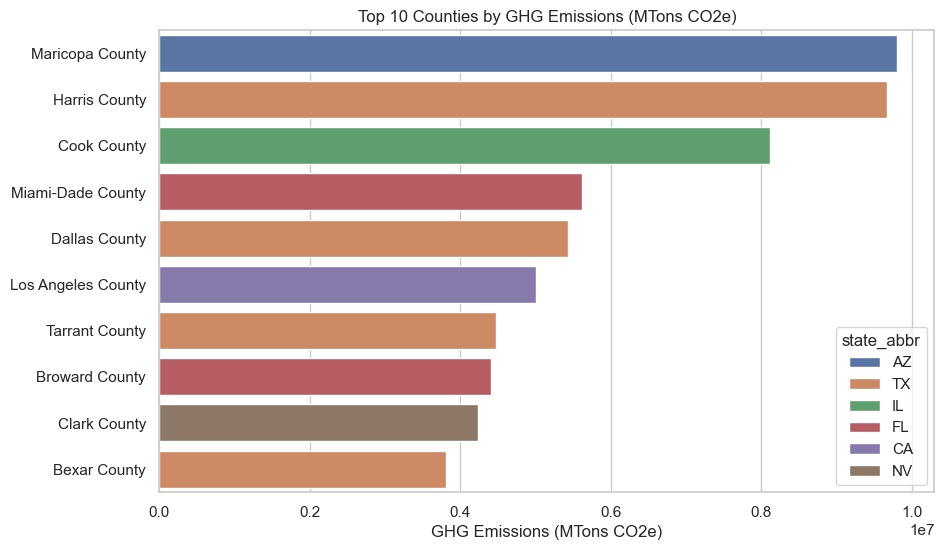

In [19]:
sns.set_theme(style="whitegrid")
top_emitters = (
    data.sort_values(EMISSIONS_COL, ascending=False)
        .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_emitters,
    y="county_name",
    x=EMISSIONS_COL,
    hue="state_abbr",
    dodge=False
)
plt.title("Top 10 Counties by GHG Emissions (MTons CO2e)")
plt.xlabel("GHG Emissions (MTons CO2e)")
plt.ylabel("")
plt.show()


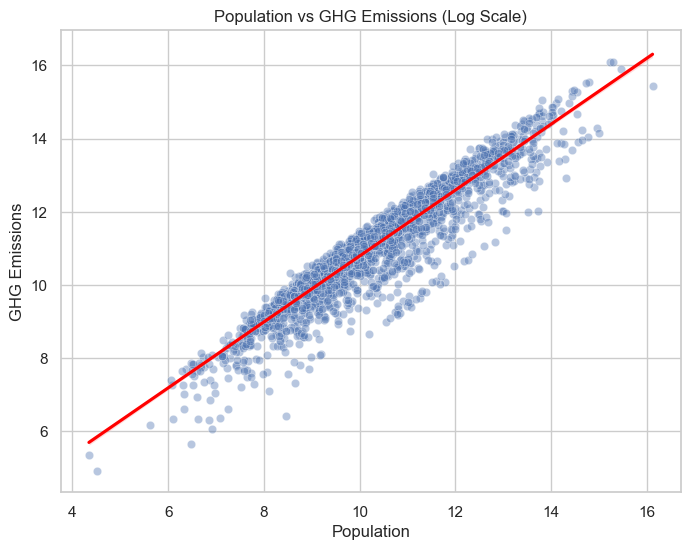

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x="log_population",
    y="log_emissions",
    alpha=0.4
)
sns.regplot(
    data=data,
    x="log_population",
    y="log_emissions",
    scatter=False,
    color="red"
)
plt.title("Population vs GHG Emissions (Log Scale)")
plt.xlabel("Population")
plt.ylabel("GHG Emissions")
plt.show()


In [22]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2, rmse

(0.8803978287795541, np.float64(0.4848372319641888))

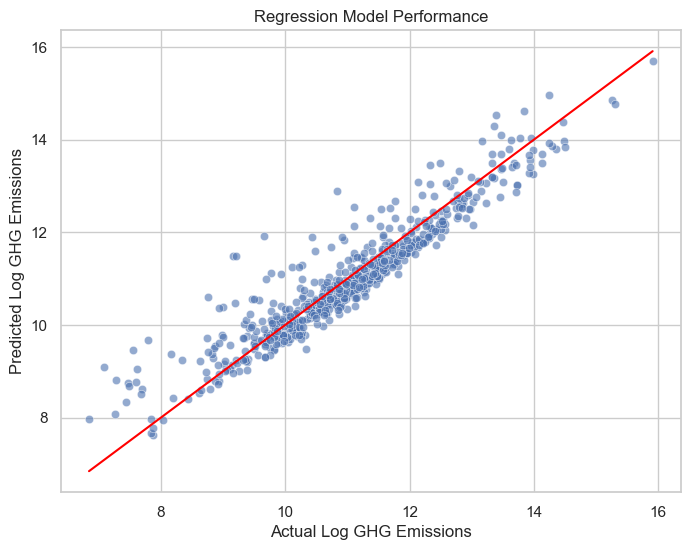

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red"
)
plt.xlabel("Actual Log GHG Emissions")
plt.ylabel("Predicted Log GHG Emissions")
plt.title("Regression Model Performance")
plt.show()

C:\Users\pylaa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


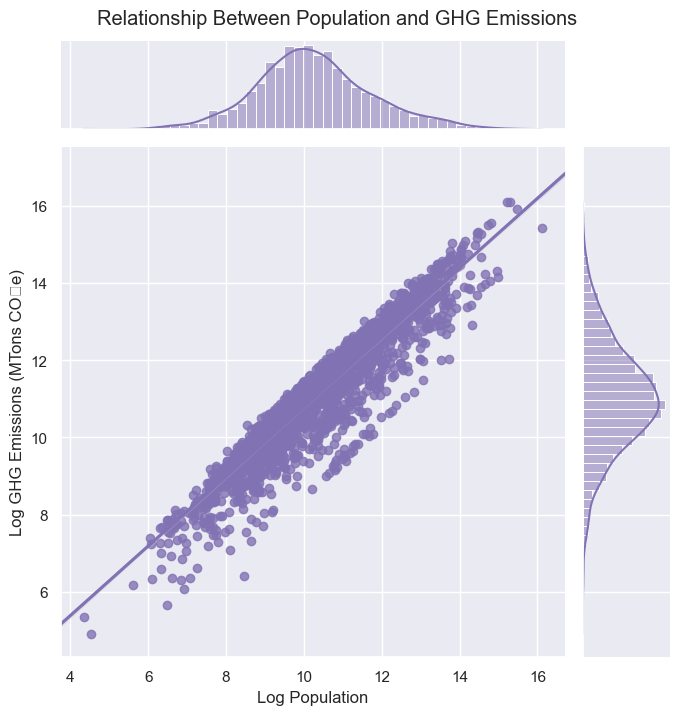

In [15]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(
    data=data,
    x="log_population",
    y="log_emissions",
    kind="reg",
    truncate=False,
    height=7,
    color="m"
)
g.set_axis_labels(
    "Log Population",
    "Log GHG Emissions (MTons CO₂e)"
)
g.fig.suptitle(
    "Relationship Between Population and GHG Emissions",
    y=1.02
)
plt.show()
